### Explorative Datenanalyse

#### Imports
<span style="font-family: Arial; font-size: 11pt;">

- `requests`: Diese Bibliothek ermöglicht das Senden von HTTP-Anfragen an Webseiten und das Abrufen von Daten.
- `BeautifulSoup` aus `bs4`: Diese Bibliothek wird verwendet, um HTML- oder XML-Dokumente zu parsen und spezifische Daten zu extrahieren.
- `psycopg2`: Diese Bibliothek stellt eine Schnittstelle zur PostgreSQL-Datenbank bereit.
- `pandas as pd`: Diese Bibliothek wird für Datenmanipulation und Datenanalyse verwendet.
- `matplotlib.pyplot as plt`: Diese Bibliothek ermöglicht die Visualisierung von Daten.
- `numpy as np`: Diese Bibliothek bietet Funktionen und Datenstrukturen für numerische Datenverarbeitung.
- `statistics`: Diese Bibliothek bietet statistische Funktionen zur Datenanalyse.
- `folium`: Diese Bibliothek ermöglicht die Erstellung interaktiver Karten und Kartenvisualisierungen.
- `geopy.geocoders.Nominatim`: Diese Bibliothek ermöglicht die Geocodierung von Adressen.
- `folium.plugins.MarkerCluster`: Dieses Modul ermöglicht das Gruppieren von Markern auf Karten.
- `seaborn as sns`: Diese Bibliothek bietet erweiterte Funktionen für Datenvisualisierung.
- `matplotlib.offsetbox.OffsetImage, AnnotationBbox`: Diese Funktionen ermöglichen das Einbetten von Bildern in Diagramme und Plots.
</span>

In [1]:
# Imports
import requests
from bs4 import BeautifulSoup
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import folium
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# Verbindung zur DB herstellen
conn = psycopg2.connect(
    host="localhost",
    database="PSQL_ADSFS2023Gruppe15",
    user="ADSFS2023Gruppe15",
    password="ADS_FS_2023_G15!?"
)

#### Datenimport
<span style="font-family: Arial; font-size: 11pt;">

- Es werden verschiedene SQL-Abfragen an die Datenbank gesendet, um Daten abzurufen.
- Die Ergebnisse werden in DataFrames gespeichert, die mit Pandas erstellt wurden.
- Die Abfragen beinhalten Tabellen wie `bundesliga_resultate`, `bundesliga_mannschaften`, `bundesliga_corners`, `bundesliga_pass_stats`, `bundesliga_shots_stats`, `bundesliga_touch_stats`, `bundesliga_distance_stats` und `bundesliga_freekicks`.
</span>

In [3]:
query = "SELECT * FROM bundesliga_resultate"
df_resultate = pd.read_sql(query, conn)

query = "SELECT * FROM bundesliga_mannschaften"
df_mannschaften = pd.read_sql(query, conn)

query = "SELECT * FROM bundesliga_corners"
df_corners = pd.read_sql(query, conn)

query = "SELECT * FROM bundesliga_pass_stats"
df_paesse = pd.read_sql(query, conn)

query = "SELECT * FROM bundesliga_shots_stats"
df_shots = pd.read_sql(query, conn)

query = "SELECT * FROM bundesliga_touch_stats"
df_touch = pd.read_sql(query, conn)

query = "SELECT * FROM bundesliga_distance_stats"
df_distance = pd.read_sql(query, conn)

query = "SELECT * FROM bundesliga_freekicks"
df_freekicks = pd.read_sql(query, conn)

c:\Users\adihu\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\adihu\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\adihu\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\adihu\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

In [111]:
# Kann in der finalen Version gelöscht werden
print(df_resultate)

     match_id matchday_date  matchday  id_teamh  id_teamg  anzahl_tore  \
0       63864    2022-08-05         1        91        40            7   
1       63865    2022-08-06         1        95       112            4   
2       63866    2022-08-06         1       129        81            3   
3       63868    2022-08-06         1        87       175            4   
4       63871    2022-08-06         1        80        54            4   
..        ...           ...       ...       ...       ...          ...   
292     64161    2023-05-20        33       134        65            2   
293     64155    2023-05-20        33        40      1635            4   
294     64159    2023-05-21        33        81        16            5   
295     64153    2023-05-21        33        95         7            3   
296     64154    2023-05-21        33         6        87            4   

     tore_teamh  tore_teamg  winner_team_id  
0             1           6              40  
1             0    

### Deskriptive Statistik

#### Datenanalyse der Spiele:

<span style="font-family: Arial; font-size: 11pt;">


Datenanalyse - Tore

- Es werden verschiedene Kennzahlen für die Anzahl der Tore berechnet, wie der Durchschnitt (`anzahl_tore_avg`), der Median (`anzahl_tore_med`) und die Standardabweichung (`anzahl_tore_std_dev`).
- Die Quartile (`anzahl_tore_q1`, `anzahl_tore_q2`, `anzahl_tore_q3`) für die Anzahl der Tore werden berechnet.
- Ein Boxplot-Diagramm für die Anzahl der Tore (`df_resultate['anzahl_tore']`) wird erstellt und angezeigt.


Datenanalyse - Tore der Heimmannschaft

- Es werden verschiedene Kennzahlen für die Anzahl der Tore der Heimmannschaft berechnet, wie der Durchschnitt (`tore_teamh_avg`), der Median (`tore_teamh_med`) und die Standardabweichung (`tore_teamh_std_dev`).
- Die Quartile (`tore_teamh_q1`, `tore_teamh_q2`, `tore_teamh_q3`) für die Anzahl der Tore der Heimmannschaft werden berechnet.
- Ein Boxplot-Diagramm für die Anzahl der Tore der Heimmannschaft (`df_resultate['tore_teamh']`) wird erstellt und angezeigt.

Datenanalyse - Tore der Gastmannschaft

- Es werden verschiedene Kennzahlen für die Anzahl der Tore der Gastmannschaft berechnet, wie der Durchschnitt (`tore_teamg_avg`), der Median (`tore_teamg_med`) und die Standardabweichung (`tore_teamg_std_dev`).
- Die Quartile (`tore_teamg_q1`, `tore_teamg_q2`, `tore_teamg_q3`) für die Anzahl der Tore der Gastmannschaft werden berechnet.
- Ein Boxplot-Diagramm für die Anzahl der Tore der Gastmannschaft (`df_resultate['tore_teamg']`) wird erstellt und angezeigt.
</span>

Kennzahlen für alle Tore
Durchschnittliche Anzahl Tore pro Spiel:  3.1784511784511786
Median der Anzahl Tore pro Spiel:  3.0
Standardabweichung aller Tore:  1.7853969271963555

Quartile für alle Tore
1. Quartil der Anzahl Tore pro Spiel:  2.0
2. Quartil der Anzahl Tore pro Spiel:  3.0
3. Quartil der Anzahl Tore pro Spiel:  4.0


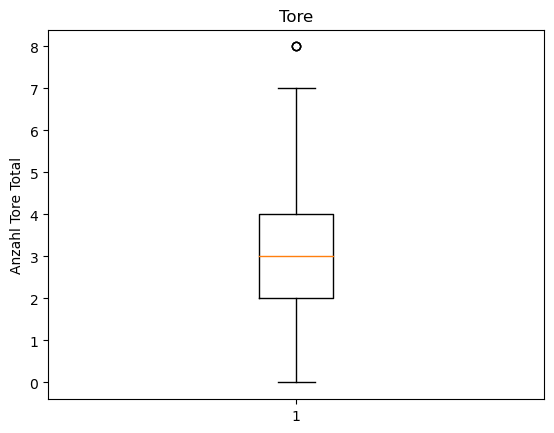


Kennzahlen für die Tore der Heimmannschaft
Durchschnittliche Anzahl Tore der Heimmannschaft:  1.8552188552188553
Median der Tore der Heimmannschaft:  2.0
Standardabweichung der Tore der Heimmannschaft:  1.4986191964136504

Quartile für Tore der Heimmannschaft
1. Quartil der Anzahl Tore der Heimmannschaft:  1.0
1. Quartil der Anzahl Tore der Heimmannschaft:  2.0
1. Quartil der Anzahl Tore der Heimmannschaft:  3.0


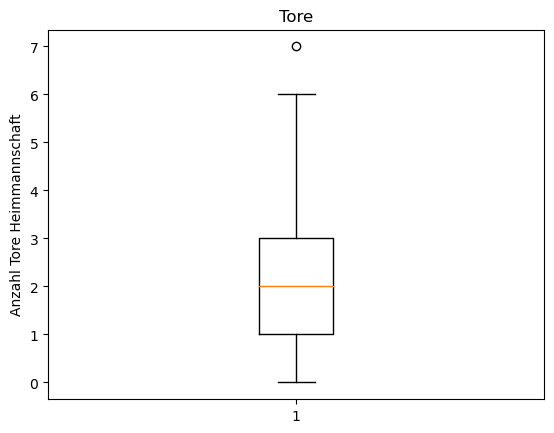


Kennzahlen für die Tore der Gastmannschaft
Durchschnittliche Anzahl Tore der Gastmannschaft:  1.3232323232323233
Median der Tore der Gastmannschaft:  2.0
Standardabweichung der Tore der Gastmannschaft:  1.4986191964136504

Quartile für Tore der Gastmannschaft
1. Quartil der Anzahl Tore der Gastmannschaft:  0.0
2. Quartil der Anzahl Tore der Gastmannschaft:  1.0
3. Quartil der Anzahl Tore der Gastmannschaft:  2.0


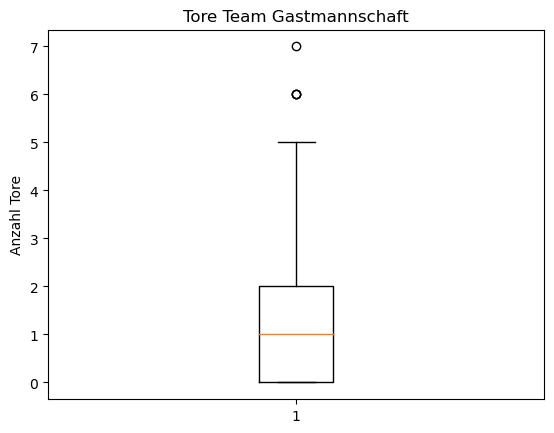

In [5]:
# Berechnen der Kennzahlen für alle Tore
anzahl_tore_avg = df_resultate['anzahl_tore'].mean()
anzahl_tore_med = df_resultate['anzahl_tore'].median()
anzahl_tore_std_dev = statistics.stdev(df_resultate['anzahl_tore'])

# Berechnen der Quartile für alle Tore
anzahl_tore_q1 = df_resultate['anzahl_tore'].quantile(0.25)
anzahl_tore_q2 = df_resultate['anzahl_tore'].quantile(0.5)
anzahl_tore_q3 = df_resultate['anzahl_tore'].quantile(0.75)

print("Kennzahlen für alle Tore")
print("Durchschnittliche Anzahl Tore pro Spiel: ", anzahl_tore_avg)
print("Median der Anzahl Tore pro Spiel: ", anzahl_tore_med)
print("Standardabweichung aller Tore: ", anzahl_tore_std_dev)
print("\nQuartile für alle Tore")
print("1. Quartil der Anzahl Tore pro Spiel: ",anzahl_tore_q1)
print("2. Quartil der Anzahl Tore pro Spiel: ",anzahl_tore_q2)
print("3. Quartil der Anzahl Tore pro Spiel: ",anzahl_tore_q3)

## Boxplot Anzahl Tore
# Daten erstellen
np.random.seed(123)
data = np.random.normal(size=100)

# Boxplot erstellen
plt.boxplot(df_resultate['anzahl_tore'])

# Diagramm beschriften
plt.title('Tore')
plt.ylabel('Anzahl Tore Total')

# Diagramm anzeigen
plt.show()

# Berechnen der Kennzahlen für Tore der Heimmannschaft
tore_teamh_avg = df_resultate['tore_teamh'].mean()
tore_teamh_med = df_resultate['tore_teamh'].median()
tore_teamh_std_dev = statistics.stdev(df_resultate['tore_teamh'])

print("\nKennzahlen für die Tore der Heimmannschaft")
print("Durchschnittliche Anzahl Tore der Heimmannschaft: ", tore_teamh_avg)
print("Median der Tore der Heimmannschaft: ", tore_teamh_med)
print("Standardabweichung der Tore der Heimmannschaft: ", tore_teamh_std_dev)

# Berechnen der Quartile für alle Tore von TeamH
tore_teamh_q1 = df_resultate['tore_teamh'].quantile(0.25)
tore_teamh_q2 = df_resultate['tore_teamh'].quantile(0.5)
tore_teamh_q3 = df_resultate['tore_teamh'].quantile(0.75)
print("\nQuartile für Tore der Heimmannschaft")
print("1. Quartil der Anzahl Tore der Heimmannschaft: ",tore_teamh_q1)
print("1. Quartil der Anzahl Tore der Heimmannschaft: ",tore_teamh_q2)
print("1. Quartil der Anzahl Tore der Heimmannschaft: ",tore_teamh_q3)

## Boxplot Anzahl Tore Heimmannschaft
# Daten erstellen
np.random.seed(123)
data = np.random.normal(size=100)

# Boxplot erstellen
plt.boxplot(df_resultate['tore_teamh'])

# Diagramm beschriften
plt.title('Tore')
plt.ylabel('Anzahl Tore Heimmannschaft')

# Diagramm anzeigen
plt.show()

# Berechnen der Kennzahlen für Tore der Gastmannschaft
tore_teamg_avg = df_resultate['tore_teamg'].mean()
tore_teamg_med = df_resultate['tore_teamg'].median()
tore_teamg_std_dev = statistics.stdev(df_resultate['tore_teamh'])

print("\nKennzahlen für die Tore der Gastmannschaft")
print("Durchschnittliche Anzahl Tore der Gastmannschaft: ", tore_teamg_avg)
print("Median der Tore der Gastmannschaft: ", tore_teamh_med)
print("Standardabweichung der Tore der Gastmannschaft: ", tore_teamg_std_dev)

# Berechnen der Quartile für alle Tore von TeamH
tore_teamg_q1 = df_resultate['tore_teamg'].quantile(0.25)
tore_teamg_q2 = df_resultate['tore_teamg'].quantile(0.5)
tore_teamg_q3 = df_resultate['tore_teamg'].quantile(0.75)
print("\nQuartile für Tore der Gastmannschaft")
print("1. Quartil der Anzahl Tore der Gastmannschaft: ",tore_teamg_q1)
print("2. Quartil der Anzahl Tore der Gastmannschaft: ",tore_teamg_q2)
print("3. Quartil der Anzahl Tore der Gastmannschaft: ",tore_teamg_q3)


## Boxplot Anzahl Tore Gastmannschaft
# Daten erstellen
np.random.seed(123)
data = np.random.normal(size=100)

# Boxplot erstellen
plt.boxplot(df_resultate['tore_teamg'])

# Diagramm beschriften
plt.title('Tore Team Gastmannschaft')
plt.ylabel('Anzahl Tore')

# Diagramm anzeigen
plt.show()


#### Kommentar zu den Resultaten (kann sich je nach Spieltag / Datenstand ändern):

<span style="font-family: Arial; font-size: 11pt;">

Erklärung der Kennzahlen und Quartile:

    Durchschnittliche Anzahl Tore pro Spiel: Dieser Wert gibt den durchschnittlichen Torewert pro Spiel an. In diesem Fall beträgt der Durchschnitt 3.132, was bedeutet, dass in einem durchschnittlichen Spiel etwa 3 Tore erzielt werden.

    Median der Anzahl Tore pro Spiel: Der Median ist der mittlere Wert in einer geordneten Liste von Zahlen. In diesem Fall beträgt der Median 3.0. Das bedeutet, dass 50% der Spiele weniger als 3 Tore haben und 50% der Spiele mehr als 3 Tore haben.

    Standardabweichung aller Tore: Die Standardabweichung ist ein Maß für die Streuung der Daten um den Durchschnittswert. In diesem Fall beträgt die Standardabweichung 1.786. Eine größere Standardabweichung deutet auf eine größere Variabilität der Tore in den Spielen hin.

    Quartile: Die Quartile teilen die Daten in vier gleich große Teile. Das 1. Quartil (25. Perzentil) gibt den Wert an, unter dem 25% der Daten liegen. Das 2. Quartil (50. Perzentil) entspricht dem Median, wie oben erklärt. Das 3. Quartil (75. Perzentil) gibt den Wert an, unter dem 75% der Daten liegen.

Für die Analyse der Tore der Heimmannschaft und der Gastmannschaft gelten dieselben Erklärungen wie oben, jedoch beziehen sich die Kennzahlen und Quartile speziell auf die Tore, die von der Heimmannschaft bzw. der Gastmannschaft erzielt wurden.

</span>

### Siege pro Mannschaft

<span style="font-family: Arial; font-size: 11pt;">

- Es wird eine Ergebnisliste mit `value_counts()` erstellt, um die Anzahl der Siege pro Team zu zählen.
- Unentschiedene Spiele werden aus der Liste entfernt.
- Die Counts werden mit den Mannschaftsnamen in `df_mannschaften` zusammengeführt, indem ein Merge (`pd.merge()`) basierend auf den Team-IDs durchgeführt wird.
- Unentschiedene Spiele werden erneut bereinigt, indem die Zeilen mit der Team-ID "0" aus dem DataFrame entfernt werden.
- Das DataFrame `df_siege_pro_team` wird umbenannt, um die Spalte mit der Anzahl der Siege umzubenennen.
- Das Ergebnis wird ausgegeben und angezeigt.

</span>

In [6]:
# Zählt die Siege pro Team

# Erstellen der Ergebnisliste mit value_counts()
value_counts = df_resultate['winner_team_id'].value_counts()

# Bereinigen der unentschiedenen Spiele
del value_counts[0]

# Counts mit den Mannschaftsnamen zusammenführen
df_siege_pro_team = pd.merge(value_counts, df_mannschaften, how='left', left_index=True, right_on='team_id')

# Bereinigen der untentschiedenen Spielen
df_siege_pro_team = df_siege_pro_team.drop(df_siege_pro_team[df_siege_pro_team['team_id'] == '0'].index)

df_siege_pro_team = df_siege_pro_team.rename(columns={'winner_team_id': 'anzahl siege'})

#print(value_counts)
print(df_siege_pro_team)


    anzahl siege  team_id                mannschaft  punkte  tore  rang
1             22        7         Borussia Dortmund    70.0  81.0  None
2             20       40         FC Bayern München    68.0  90.0  None
3             19     1635                RB Leipzig    63.0  60.0  None
4             17       80        1. FC Union Berlin    59.0  50.0  None
5             17      112               SC Freiburg    59.0  50.0  None
6             14        6          Bayer Leverkusen    50.0  57.0  None
7             13      131             VfL Wolfsburg    49.0  56.0  None
9             12       81           1. FSV Mainz 05    45.0  52.0  None
8             12       91       Eintracht Frankfurt    47.0  56.0  None
13            10      175       TSG 1899 Hoffenheim    35.0  47.0  None
12            10      134             Werder Bremen    36.0  51.0  None
10            10       65                1. FC Köln    42.0  48.0  None
11            10       87  Borussia Mönchengladbach    40.0  50.

#### Zusammenhang zwischen Siegen und Schüssen

<span style="font-family: Arial; font-size: 11pt;">

- Der DataFrame `df_shots` wird nach der Team-ID gruppiert und die Summe der Schüsse pro Team berechnet.
- Ein Scatterplot wird erstellt, bei dem die Anzahl der Siege (`merged_df['anzahl siege']`) auf der x-Achse und die Anzahl der Schüsse (`sum_freekicks_total`) auf der y-Achse dargestellt werden.
- Ein Scatterplot wird erstellt, bei dem die Anzahl der Siege (`merged_df['anzahl siege']`) auf der x-Achse und die Anzahl der Schüsse (`sum_paesse_total`) auf der y-Achse dargestellt werden.
- Der Plot wird beschriftet, indem die Achsenbeschriftungen und ein Titel hinzugefügt werden.
- Der Scatterplot wird angezeigt.
- Der Korrelationskoeffizient wird berechnet, indem die Korrelationsmatrix (`correlation_matrix`) mithilfe der Funktion `np.corrcoef()` erstellt wird.
- Der Korrelationskoeffizient wird aus der Matrix extrahiert (`correlation_coefficient = correlation_matrix[0, 1]`).
- Der Korrelationskoeffizient wird ausgegeben und angezeigt.
</span>

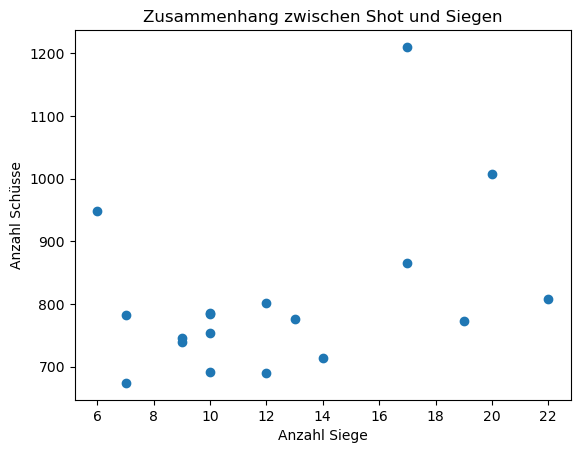

Korrelationskoeffizient für den Zusammenhang zwischen Siegen und Schüssen beträgt: 0.39551944859168786


In [8]:
#Schüsse
# Gruppieren des DataFrames nach "team_id" und berechnen der Summe von "shots_total"
sum_shots_total = df_shots.groupby('team_id')['shots_total'].sum()

plt.scatter(df_siege_pro_team['anzahl siege'], sum_shots_total)

# Beschriften des Plots
plt.xlabel('Anzahl Siege')
plt.ylabel('Anzahl Schüsse')
plt.title('Zusammenhang zwischen Shot und Siegen')

# Anzeigen des Scatterplots
plt.show()

# Berechnen des Korrelationskoeffizienten
correlation_matrix = np.corrcoef(df_siege_pro_team['anzahl siege'], sum_shots_total)

# Extrahieren des Korrelationskoeffizienten aus der Matrix
correlation_coefficient = correlation_matrix[0, 1]

# Anzeigen des Korrelationskoeffizient
print("Korrelationskoeffizient für den Zusammenhang zwischen Siegen und Schüssen beträgt:", correlation_coefficient)

### Zusammenhang zwischen Siegen und Freistössen
<span style="font-family: Arial; font-size: 11pt;">

Der Code analysiert den Zusammenhang zwischen der Anzahl der Siege und der Anzahl der Freistösse. Zunächst wird ein Scatterplot erstellt, der die Anzahl der Siege auf der x-Achse und die Summe der Freistösse auf der y-Achse darstellt. Anschließend wird der Korrelationskoeffizient berechnet, um die Stärke und Richtung des Zusammenhangs zu quantifizieren. Der Korrelationskoeffizient wird als Maßzahl für die lineare Beziehung zwischen Siegen und Freistössen verwendet. Ein positiver Koeffizient zeigt einen tendenziell positiven Zusammenhang an. Du kannst den Scatterplot anzeigen und den Korrelationskoeffizienten ausgeben, um den Zusammenhang zwischen Siegen und Freistössen besser zu verstehen.
</span>

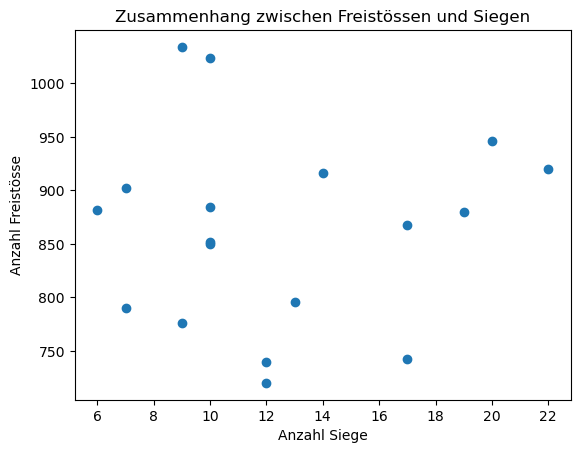

Korrelationskoeffizient für den Zusammenhang zwischen Siegen und Freistössen beträgt: 0.041823709292372446


In [9]:
# Freistösse
# Gruppieren des DataFrames nach "team_id" und berechnen der Summe von "freekicks_total"
sum_freekicks_total = df_freekicks.groupby('team_id')['freekicks_total'].sum()

plt.scatter(df_siege_pro_team['anzahl siege'], sum_freekicks_total)

# Beschriften des Plots
plt.xlabel('Anzahl Siege')
plt.ylabel('Anzahl Freistösse')
plt.title('Zusammenhang zwischen Freistössen und Siegen')

# Anzeigen des Scatterplots
plt.show()

# Berechnen des Korrelationskoeffizienten
correlation_matrix = np.corrcoef(df_siege_pro_team['anzahl siege'], sum_freekicks_total)

# Extrahieren des Korrelationskoeffizienten aus der Matrix
correlation_coefficient = correlation_matrix[0, 1]

# Anzeigen des Korrelationskoeffizienten
print("Korrelationskoeffizient für den Zusammenhang zwischen Siegen und Freistössen beträgt:", correlation_coefficient)


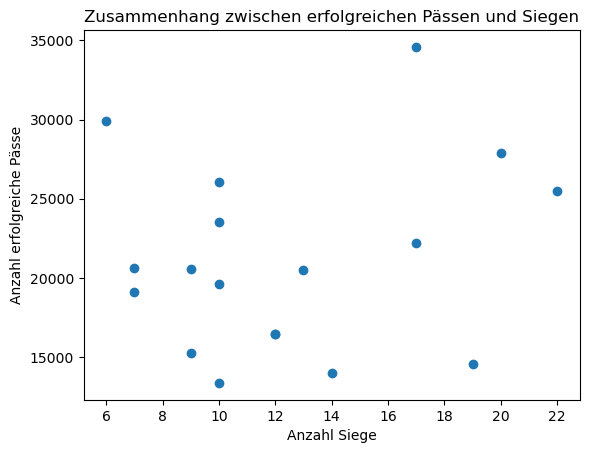

Korrelationskoeffizient für den Zusammenhang zwischen Siegen und erfolgreichen Pässen beträgt: 0.19426386288121553


In [65]:
# Erfolgreiche Pässe
# Gruppieren des DataFrames nach "team_id" und berechnen der Summe von "paesse_total"
sum_paesse_total = df_paesse.groupby('team_id')['pass_complete'].sum()

plt.scatter(df_siege_pro_team['anzahl siege'], sum_paesse_total)

# Beschriften des Plots
plt.xlabel('Anzahl Siege')
plt.ylabel('Anzahl erfolgreiche Pässe')
plt.title('Zusammenhang zwischen erfolgreichen Pässen und Siegen')

# Anzeigen des Scatterplots
plt.show()

# Berechnen des Korrelationskoeffizienten
correlation_matrix = np.corrcoef(df_siege_pro_team['anzahl siege'], sum_paesse_total)

# Extrahieren des Korrelationskoeffizienten aus der Matrix
correlation_coefficient = correlation_matrix[0, 1]

# Anzeigen des Korrelationskoeffizienten
print("Korrelationskoeffizient für den Zusammenhang zwischen Siegen und erfolgreichen Pässen beträgt:", correlation_coefficient)

Verteilung von Pässen, Freistössen, Touches, Distance

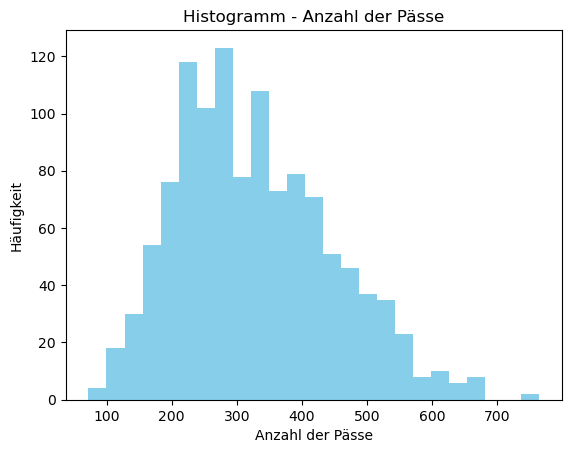

In [50]:
# Histogramm Pässe
# Extrahiere die Spalte "pass_complete"
pass_total = df_paesse['pass_complete']

# Erstelle das Histogramm
plt.hist(pass_total, bins=25, color='skyblue')

# Beschriftungen
plt.title('Histogramm - Anzahl der Pässe')
plt.xlabel('Anzahl der Pässe')
plt.ylabel('Häufigkeit')

# Zeige das Histogramm an
plt.show()

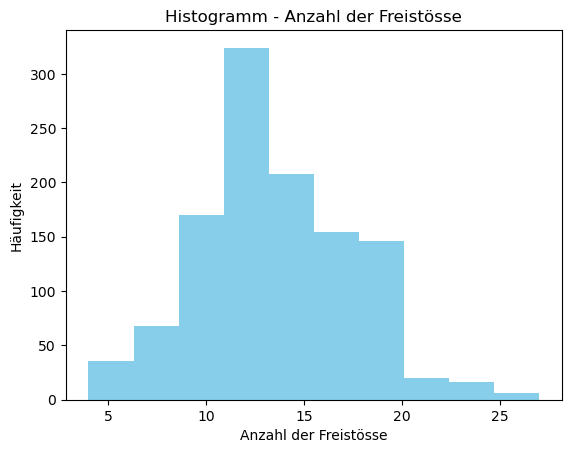

In [64]:
# Histogramm Freistösse
# Extrahiere die Spalte "freekicks_total"
freekicks_total = df_freekicks['freekicks_total']

# Erstelle das Histogramm
plt.hist(freekicks_total, bins=10, color='skyblue')

# Beschriftungen
plt.title('Histogramm - Anzahl der Freistösse')
plt.xlabel('Anzahl der Freistösse')
plt.ylabel('Häufigkeit')

# Zeige das Histogramm an
plt.show()

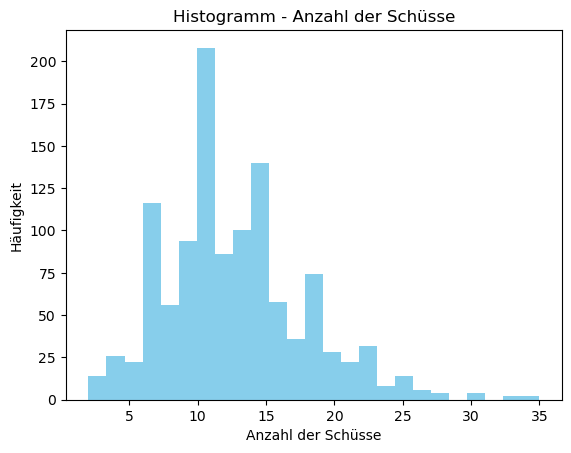

In [58]:
# Histogramm Schüsse
# Extrahiere die Spalte "shots_total"
shots_total = df_shots['shots_total']

# Erstelle das Histogramm
plt.hist(shots_total, bins=25, color='skyblue')

# Beschriftungen
plt.title('Histogramm - Anzahl der Schüsse')
plt.xlabel('Anzahl der Schüsse')
plt.ylabel('Häufigkeit')

# Zeige das Histogramm an
plt.show()

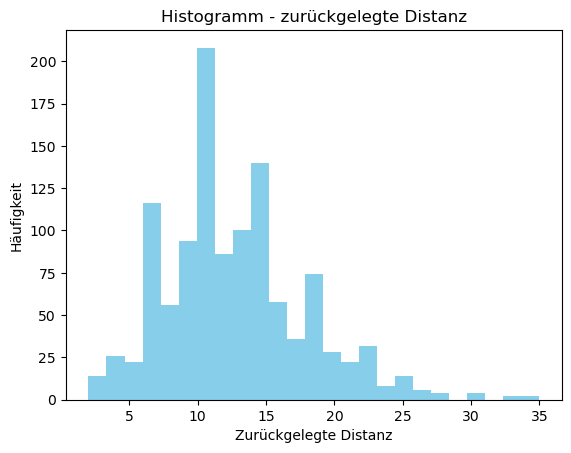

In [61]:
# Histogramm Distanz
# Extrahiere die Spalte "distance_total"
distance_total = df_distance['distance_total']

# Erstelle das Histogramm
plt.hist(shots_total, bins=25, color='skyblue')

# Beschriftungen
plt.title('Histogramm - zurückgelegte Distanz')
plt.xlabel('Zurückgelegte Distanz')
plt.ylabel('Häufigkeit')

# Zeige das Histogramm an
plt.show()

Argumentation bzgl. Ausreisser
tbd

#### Kommentar zu den Resultaten (kann sich je nach Spieltag / Datenstand ändern)

<span style="font-family: Arial; font-size: 11pt;">

Der Korrelationskoeffizient für den Zusammenhang zwischen Siegen und Freekicks beträgt 0.0382. Dies deutet darauf hin, dass es nur eine sehr schwache positive Korrelation zwischen der Anzahl der Siege und der Anzahl der Freekicks gibt. Der Zusammenhang ist praktisch vernachlässigbar.
</span>

#### Schüsse pro Team
<span style="font-family: Arial; font-size: 11pt;">

Der Code erstellt eine Liste mit der Anzahl der Schüsse pro Team und gruppiert den DataFrame nach "team_id", um die Summe der Schüsse für jedes Team zu berechnen. Die Ergebnisse werden dann mit den Mannschaftsnamen im DataFrame `df_mannschaften` zusammengeführt. Die Tabelle wird bereinigt, indem die Einträge für unentschiedene Spiele entfernt werden. Schließlich wird der DataFrame umbenannt und die Anzahl der Siege als "anzahl siege" bezeichnet. Die Tabelle `df_shots_pro_team` wird ausgegeben, um die Schüsse pro Team anzuzeigen.
</span>

In [10]:
# Erstellen einer Ergebnisliste mit value_counts()
value_counts_shots = df_shots['team_id'].value_counts()

# Gruppiere des DataFrames nach "team_id" und berechnen der Summe von "shots_total"
sum_shots_total = df_shots.groupby('team_id')['shots_total'].sum()

# Führt die Counts mit den Mannschaftsnamen zusammen
df_shots_pro_team = pd.merge(value_counts, df_mannschaften, how='left', left_index=True, right_on='team_id')

# Bereinigen der untentschiedenen Spielen
df_shots_pro_team = df_shots_pro_team.drop(df_shots_pro_team[df_shots_pro_team['team_id'] == '0'].index)

df_shots_pro_team = df_shots_pro_team.rename(columns={'winner_team_id': 'anzahl siege'})

#print(value_counts)
print(df_shots_pro_team)

    anzahl siege  team_id                mannschaft  punkte  tore  rang
1             22        7         Borussia Dortmund    70.0  81.0  None
2             20       40         FC Bayern München    68.0  90.0  None
3             19     1635                RB Leipzig    63.0  60.0  None
4             17       80        1. FC Union Berlin    59.0  50.0  None
5             17      112               SC Freiburg    59.0  50.0  None
6             14        6          Bayer Leverkusen    50.0  57.0  None
7             13      131             VfL Wolfsburg    49.0  56.0  None
9             12       81           1. FSV Mainz 05    45.0  52.0  None
8             12       91       Eintracht Frankfurt    47.0  56.0  None
13            10      175       TSG 1899 Hoffenheim    35.0  47.0  None
12            10      134             Werder Bremen    36.0  51.0  None
10            10       65                1. FC Köln    42.0  48.0  None
11            10       87  Borussia Mönchengladbach    40.0  50.

#### Balkendiagramm Verhältnis zwischen Schüssen und Toren
<span style="font-family: Arial; font-size: 11pt;">

Der folgende Code visualisiert die Anzahl der Schüsse und Tore pro Mannschaft. Zunächst werden die Schüsse pro Mannschaft aggregiert und in der Variable `sum_shots_total` gespeichert. Anschließend werden die Schussdaten mit den Mannschaftsnamen im DataFrame `df_mannschaften` zusammengeführt und bereinigt. Die extrahierten Daten (Mannschaftsnamen, Anzahl Schüsse, Anzahl Tore) werden für das Balkendiagramm vorbereitet. Mit `plt.bar()` werden Balken für die Anzahl der Schüsse und Tore pro Mannschaft erstellt. Die Mannschaftswappen werden als Bilder zu den Balken hinzugefügt. Achsenbeschriftungen, Titel und die Legende werden festgelegt. Das Balkendiagramm wird angezeigt.
</span>

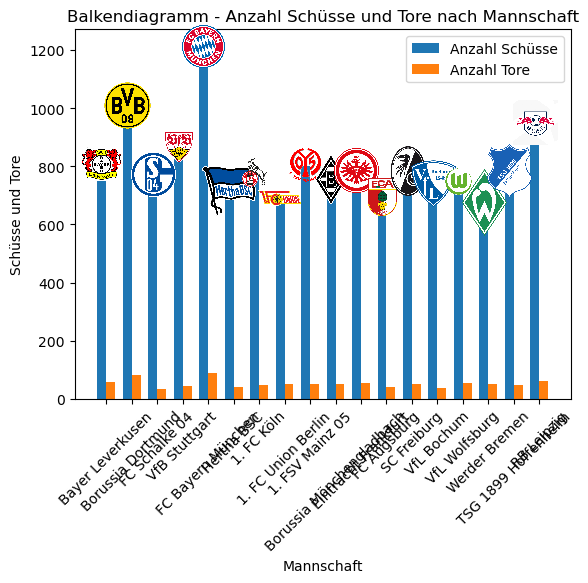

In [63]:
# Schüsse und Tore Balkendiagramm
# Gruppieren des DataFrames nach "team_id" und berechnen der Summe von "shots_total"
sum_shots_total = df_shots.groupby('team_id')['shots_total'].sum()

# Führt die Counts mit den Mannschaftsnamen zusammen
df_shots_pro_team = pd.merge(sum_shots_total, df_mannschaften, how='left', left_index=True, right_on='team_id')

# Bereinigen der untentschiedenen Spielen
df_shots_pro_team = df_shots_pro_team.drop(df_shots_pro_team[df_shots_pro_team['team_id'] == '0'].index)

df_shots_pro_team = df_shots_pro_team.rename(columns={'winner_team_id': 'anzahl siege'})

# Daten aus dem merged_df extrahieren
mannschaften = df_shots_pro_team['mannschaft']
anzahl_shots = df_shots_pro_team['shots_total']
anzahl_tore = df_shots_pro_team['tore']

# Erstellung des Balkendiagramms
breite = 0.35  # Breite der Balken
ind = np.arange(len(mannschaften))  # x-Koordinaten für die Balken

# Abbildungen für die Beschriftung
bilder = []
for mannschaft in mannschaften:
    # Pfad zu den bei uns verwendeten Bildern
    bildpfad = fr"./Mannschaften/{mannschaft}.png"
    bild = plt.imread(bildpfad)
    bilder.append(bild)

# Erste Gruppe von Balken mit den Anzahl-Siege-Daten
plt.bar(ind, anzahl_shots, width=breite, label='Anzahl Schüsse')

# Zweite Gruppe von Balken mit den Anzahl-Unentschieden-Daten
plt.bar(ind + breite, anzahl_tore, width=breite, label='Anzahl Tore')

# Bilder in das Balkendiagramm einfügen
for i, (x, y) in enumerate(zip(ind, anzahl_shots)):
    imagebox = OffsetImage(bilder[i], zoom=0.04)
    imagebox.image.axes = plt.gca()
    ab = AnnotationBbox(imagebox, (x, y), xycoords='data', frameon=False)
    plt.gca().add_artist(ab)

# Hinzufügen von den relevanten Beschriftungen
plt.xlabel('Mannschaft')
plt.ylabel('Schüsse und Tore')
plt.title('Balkendiagramm - Anzahl Schüsse und Tore nach Mannschaft')
plt.xticks(ind + breite / 2, mannschaften, rotation=45)

# Legende anzeigen
plt.legend()

# Anzeige des Balkendiagramms
plt.show()

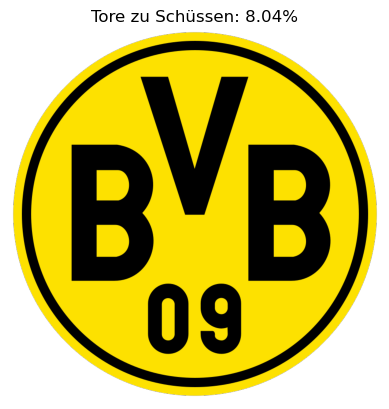

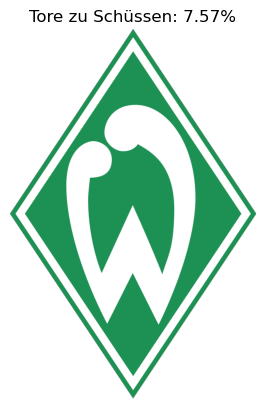

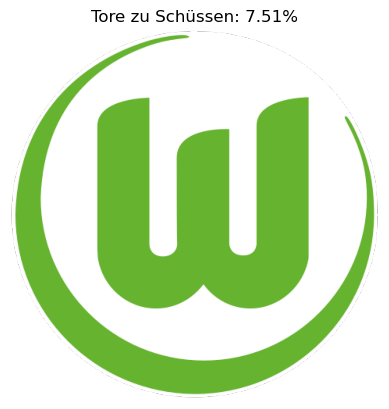

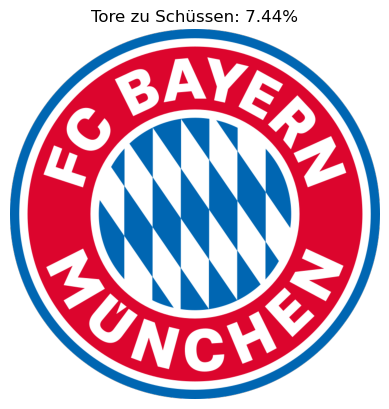

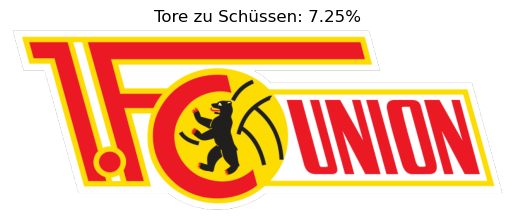

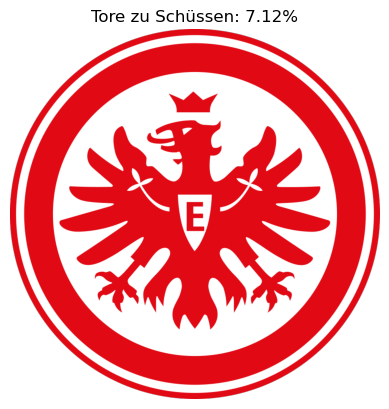

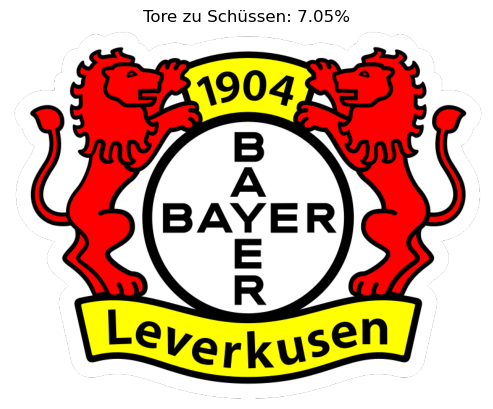

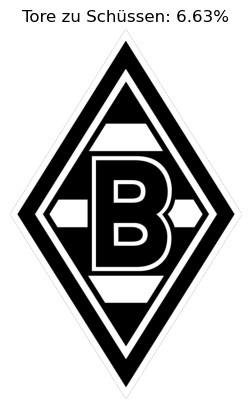

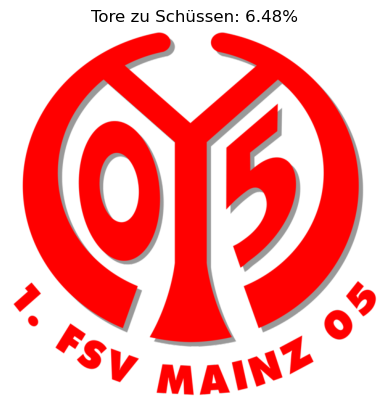

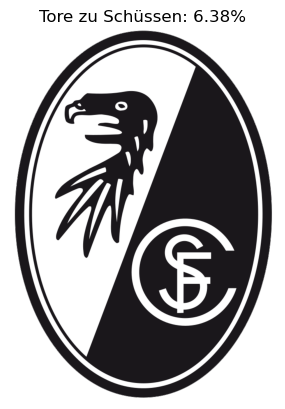

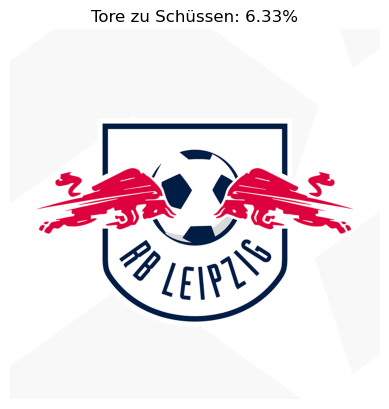

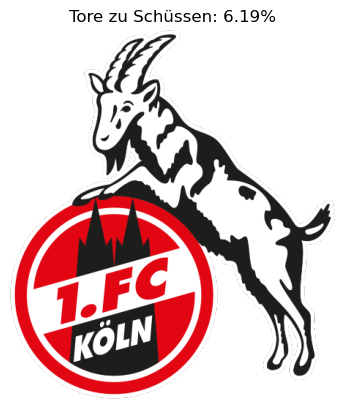

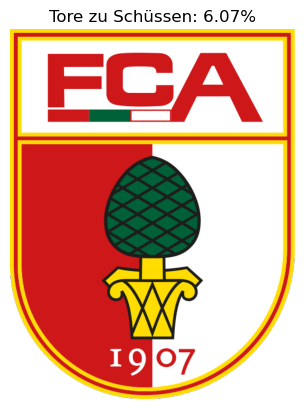

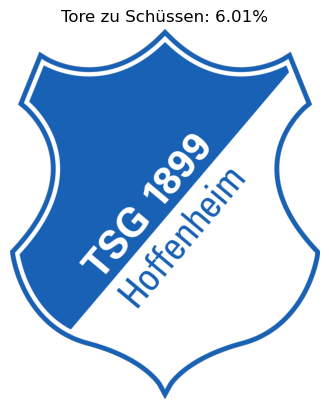

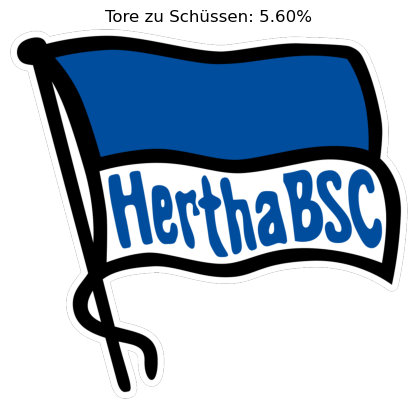

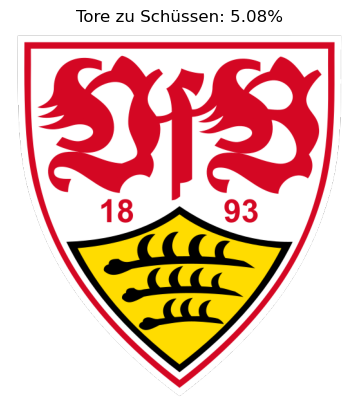

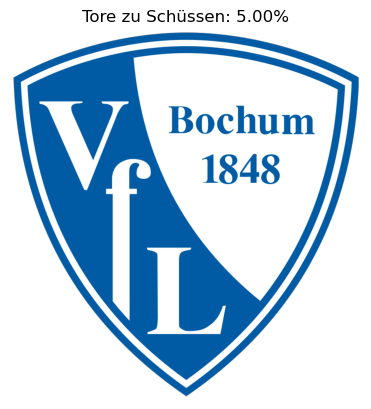

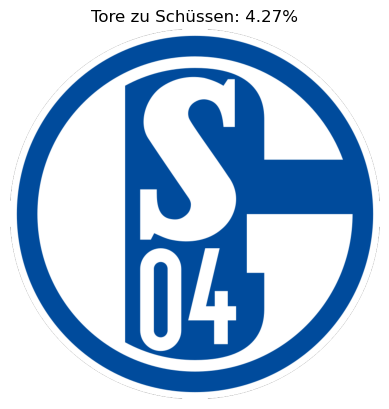

In [67]:
# Berechnung des Verhältnisses von Toren zu Schüssen
verhaeltnis_tore_schuesse = df_shots_pro_team['tore'] / df_shots_pro_team['shots_total'] * 100

# Erstellung der Liste mit Bildern und Verhältnis
liste_mit_bildern_und_verhaeltnis = []
for i, (mannschaft, verhaeltnis) in enumerate(zip(mannschaften, verhaeltnis_tore_schuesse)):
    # Hier können Sie den Pfad zu Ihren Bildern entsprechend anpassen
    bildpfad = fr"./Mannschaften/{mannschaft}.png"
    bild = plt.imread(bildpfad)
    liste_mit_bildern_und_verhaeltnis.append([bild, verhaeltnis])

# Sortieren der Liste in absteigender Reihenfolge nach dem Verhältnis
liste_mit_bildern_und_verhaeltnis.sort(key=lambda x: x[1], reverse=True)

# Ausgabe der Liste
for item in liste_mit_bildern_und_verhaeltnis:
    bild = item[0]
    verhaeltnis = item[1]
    plt.figure()
    plt.imshow(bild)
    plt.title(f'Tore zu Schüssen: {verhaeltnis:.2f}%')
    plt.axis('off')
    plt.show()

#### Heatmap Anzahl Siege, Freistösse & Schüsse
<span style="font-family: Arial; font-size: 11pt;">

In diesem Codeabschnitt wird eine Heatmap erstellt, um den Zusammenhang zwischen drei Variablen zu visualisieren: Anzahl Siege, Anzahl Freistösse (Freekicks) und Anzahl Schüsse. Die Daten für diese Variablen werden in einer Liste `data` zusammengefasst.

Dann wird die Funktion `sns.heatmap()` aufgerufen und die Liste data als Argument übergeben. Dadurch wird eine Heatmap erstellt, in der die Werte der Variablen in Form von Farbintensitäten dargestellt werden. Die Farbskala zeigt den Zusammenhang zwischen den Variablen an.

Schließlich wird die Heatmap mit `plt.show()` angezeigt.
</span>

In [112]:
print(df_resultate)

     match_id matchday_date  matchday  id_teamh  id_teamg  anzahl_tore  \
0       63864    2022-08-05         1        91        40            7   
1       63865    2022-08-06         1        95       112            4   
2       63866    2022-08-06         1       129        81            3   
3       63868    2022-08-06         1        87       175            4   
4       63871    2022-08-06         1        80        54            4   
..        ...           ...       ...       ...       ...          ...   
292     64161    2023-05-20        33       134        65            2   
293     64155    2023-05-20        33        40      1635            4   
294     64159    2023-05-21        33        81        16            5   
295     64153    2023-05-21        33        95         7            3   
296     64154    2023-05-21        33         6        87            4   

     tore_teamh  tore_teamg  winner_team_id  
0             1           6              40  
1             0    

In [120]:
# Daten mergen
# Führe die Merge-Operationen durch
#merged_df = df_corners.merge(df_distance, on=['matchday', 'team_id'], suffixes=('_corners', '_distance'))
merged_df = df_distance.merge(df_freekicks, on=['matchday', 'team_id'], suffixes=('_merged', '_freekicks'))
merged_df = merged_df.merge(df_paesse, on=['matchday', 'team_id'], suffixes=('_merged_paesse', '_paesse'))
merged_df = merged_df.merge(df_shots, on=['matchday', 'team_id'], suffixes=('_merged_shots', '_shots'))
merged_df = merged_df.merge(df_touch, on=['matchday', 'team_id'], suffixes=('_merged_touch', '_touch'))
merged_df = merged_df.merge(df_resultate, left_on=['team_id'], right_on=['id_teamh'], how='left')
merged_df = merged_df.merge(df_resultate, left_on=['team_id'], right_on=['id_teamg'], how='left')


# Doppelte Spalten löschen
merged_df = merged_df.drop(['matchday_x', 'match_id_x', 'id_teamh_y', 'id_teamg_y', 'matchday_date_x','match_id_y','matchday', 'matchday_y', 'id_merged','id_merged_shots', 'id_shots', 'id_freekicks', 'id', 'id_merged_shots'], axis=1)

# Neue Spalte für Resultat hinzufügen
merged_df['result'] = ''

# Dubletten löschen
merged_df = merged_df.drop_duplicates(subset=['team_id', 'distance_total', 'freekicks_total', 'pass_complete', 'pass_failed', 'pass_total', 'pass_percentage', 'shots_total', 'touches_total', 'id_teamh_x'
])

# Spalten umbenennen
merged_df = merged_df.rename(columns={'id_teamh_x': 'id_teamh'})
merged_df = merged_df.rename(columns={'id_teamg_x': 'id_teamg'})
merged_df = merged_df.rename(columns={'anzahl_tore_x': 'anzahl_tore'})
merged_df = merged_df.rename(columns={'tore_teamh_x': 'tore_teamh'})
merged_df = merged_df.rename(columns={'tore_teamg_x': 'tore_teamg'})
merged_df = merged_df.rename(columns={'winner_team_id_x': 'winner_team_id'})
merged_df = merged_df.rename(columns={'matchday_date_y': 'matchday_date'})
merged_df = merged_df.rename(columns={'anzahl_tore_y': 'anzahl_tore'})
merged_df = merged_df.rename(columns={'tore_teamh_y': 'tore_teamh'})
merged_df = merged_df.rename(columns={'tore_teamg_y': 'tore_teamg'})
merged_df = merged_df.rename(columns={'winner_team_id_y': 'winner_team_id'})

print(merged_df['winner_team_id'].unique())



#print(merged_df.columns)



AttributeError: 'DataFrame' object has no attribute 'unique'

#### Kommentar zu den Resultaten (kann sich je nach Spieltag / Datenstand ändern)

<span style="font-family: Arial; font-size: 11pt;">

Der Korrelationskoeffizient von 0.3907 zeigt eine positive, aber schwache Korrelation zwischen Siegen und Schüssen. Die Anzahl der Schüsse tendiert dazu, mit zunehmenden Siegen eines Teams zu steigen, jedoch gibt es auch andere Faktoren, die den Erfolg beeinflussen. Der Korrelationskoeffizient gibt nur die lineare Beziehung an und sagt nichts über Kausalität aus. Eine umfassendere Analyse unter Berücksichtigung weiterer Variablen wäre hilfreich, um die Zusammenhänge genauer zu verstehen. Das geschieht nun in den folgenden Abschnitten.
</span>

#### Geographische Darstellung der Siege

<span style="font-family: Arial; font-size: 11pt;">


Der Code verwendet das Nominatim-Objekt aus der geopy.geocoders-Bibliothek, um die geografischen Koordinaten (Breitengrad und Längengrad) für verschiedene Orte zu erhalten.

- Ein Nominatim-Objekt wird erstellt und dem Parameter `user_agent` ein bestimmter Name zugewiesen.
- Eine Schleife iteriert über jede Zeile des DataFrames `df_siege_pro_team`.
- Für jede Zeile wird der Wert in der Spalte "mannschaft" als Ort (ort) verwendet.
- Mit `geolocator.geocode(ort)` wird der geografische Ort des Ortsnamens ermittelt.
- Wenn ein Ort gefunden wurde, werden die Breiten- und Längengrade in den entsprechenden Spalten des DataFrames aktualisiert.
- Das aktualisierte DataFrame `df_siege_pro_team` und die Datentypen der Spalten werden mit `print()` ausgegeben.

</span>

In [ ]:
# Erstellt ein Geocoder-Objekt
geolocator = Nominatim(user_agent="dein_agent_name")

# Iteriert durch die Zeilen des DataFrame für den Erhalt der Koordinaten für jeden Ort
for index, row in df_siege_pro_team.iterrows():
    ort = row['mannschaft']
    location = geolocator.geocode(ort)
    if location:
        df_siege_pro_team.at[index, 'Breitengrad'] = location.latitude
        df_siege_pro_team.at[index, 'Längengrad'] = location.longitude

# Zeigt den aktualisierten DataFrame an
print(df_siege_pro_team)
print(df_siege_pro_team.dtypes)

    anzahl siege  team_id                mannschaft  punkte  tore  rang  \
2             20        7         Borussia Dortmund    64.0  73.0  None   
1             19       40         FC Bayern München    65.0  83.0  None   
3             17     1635                RB Leipzig    57.0  55.0  None   
4             16       80        1. FC Union Berlin    56.0  44.0  None   
5             16      112               SC Freiburg    56.0  46.0  None   
6             14        6          Bayer Leverkusen    48.0  54.0  None   
8             12       81           1. FSV Mainz 05    45.0  51.0  None   
7             12      131             VfL Wolfsburg    46.0  54.0  None   
9             11       91       Eintracht Frankfurt    43.0  51.0  None   
11            10       87  Borussia Mönchengladbach    39.0  46.0  None   
10            10       65                1. FC Köln    41.0  47.0  None   
12            10      134             Werder Bremen    35.0  49.0  None   
14             9      175

#### Geographische Darstellung

<span style="font-family: Arial; font-size: 11pt;">


Der Code erstellt eine interaktive Karte mit Hilfe der folium-Bibliothek.

- Eine Karte wird erstellt und mit `folium.Map()` initialisiert. Die geografischen Koordinaten [51.1657, 10.4515] werden als Startposition festgelegt, der Zoom-Level auf 6 eingestellt und der Kartenstil auf "OpenStreetMap" gesetzt.
- Ein GeoJSON-Datensatz mit den geografischen Informationen für Deutschland wird als `geojson_data` definiert.
- Mit `folium.Choropleth()` wird eine Choroplethenkarte erstellt. Das GeoJSON-Datensatz wird als `geo_data` übergeben, die Füllfarbe auf "YlOrRd", die Füllopazität auf 0.7 und die Linienopazität auf 0.2 eingestellt. Die Choroplethenkarte wird der Karte `m` hinzugefügt.
- Eine Schleife iteriert über jede Zeile des DataFrames df_siege_pro_team `user_agent`.
- Für jede Zeile werden der Name der Mannschaft (name) `user_agent`, der Breitengrad `(breitengrad)`, der Längengrad `(laengengrad)` und die Anzahl der Siege `(size)` abgerufen.
- Mit `folium.CircleMarker()` wird ein Kreismarker für jede Mannschaft erstellt. Die geografischen Koordinaten, der Radius basierend auf der Anzahl der Siege, die Füllfarbe auf Rot, die Füllopazität auf 100 und ein Popup mit dem Namen der Mannschaft werden festgelegt. Der Kreismarker wird der Karte m hinzugefügt.
- Die fertige Karte `m` wird ausgegeben und angezeigt.

</span>

In [ ]:
# Erstellt eine Karte von Deutschland
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6, tiles='OpenStreetMap')

# Lädt die GeoJSON-Daten für Deutschland
geojson_data = 'Map_Deutschland.geojson'

# Fügt die GeoJSON-Daten als Choropleth-Layer hinzu
folium.Choropleth(
    geo_data=geojson_data,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)


for index, row in df_siege_pro_team.iterrows():
    name = row['mannschaft']
    breitengrad = float(row['Breitengrad'])
    laengengrad = float(row['Längengrad'])
    size = (row['anzahl siege'])
    folium.CircleMarker([breitengrad, laengengrad], radius=size, fill=True, color = 'red', fill_opacity= 100, popup=name).add_to(m)

# Zeigt die Karte an
m